# Handling datasets

## Databases
Python has tools for accessing most (all?) databases
- e.g. MySQL, SQLite, MongoDB, Postgres

Allows one to work with huge datasets

Data can be at remote locations

Robust and fast

May require knowledge of DB-specific language

But often provide Pythonic interface

E.g. uses
- accessing user data (need to collate all changes)

### SQLite
Good for just trying out a database, to get started
- Lightweight
- No server
- Just uses files (convenient, but less powerful)
- standard python module: ```sqlite3```

### MariaDB (MySQL)
- Widely used
- Need MySQL server installed
- Official python packages: ```mariadb```
- Third party pyton packages: ```SQLAlchemy```, ```mysqlclient```, ```pymysql```, ```MySQLdb```

### MongoDB
NoSQL database 
- Documents rather than tables (more flexible, SQL fixed tables can be hard to update)
- NeedMongo database server
- Official python package: ```pymongo```
- Probably less use in science, since less rigid

## DB pros and cons

Good for dealing with small parts, in streams of data
- Allows one to work wth huge datasets
- Data can be at remote locations
- Fast random read and write
- Concurrent, atomic transactions

However, most databases designed for webserver use
- typically not optimised for data analysis
- write once, multiple sequential reads

## Pandas
Python Data Analysis Library
- https://pandas.pydata.org

Easy-to-use data structures
- DataFrame (more friendly recarray
- Handles missing data (more friendly masked array)
- Read and write various data formats
- Data alignment
    - Tries to be helpful, but not always intuitive
- Easy to combine data tables
- Surprisingly fast!

## Pandas demo

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# better looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['font.size'] = 18

### pandas provides a 1D series object, and 2D data frame
For higher-dimensionality use a "multi-index"

In [6]:
# create data frame from numpy array
t = np.arange(0.0, 1.0, 0.1)
s = pd.Series(t)

can also create data frame by creating multiple columns


In [8]:
# e.g. simplest case, using a dictionary
x = t + np.random.normal(scale=0.1, size=t.shape)
y = x**2 + np.random.normal(scale=0.5, size=t.shape)
df1 = pd.DataFrame({'x': x, 'y': y})

### All pandas objects are indexed

In [9]:
s

0    0.0
1    0.1
2    0.2
3    0.3
4    0.4
5    0.5
6    0.6
7    0.7
8    0.8
9    0.9
dtype: float64

In [10]:
df1

,x,y
0,0.218046,0.127729
1,0.096169,0.381162
2,0.194856,0.251589
3,0.353908,1.029643
4,0.433169,-0.174312
5,0.557287,1.203427
6,0.578677,1.023158
7,0.475248,1.088102
8,0.950288,0.977494
9,0.909651,0.056299


### Sometimes it makes sense to use another variable as the index

In [12]:
# e.g. use t as your index
df1 = pd.DataFrame({'x': x, 'y': y}, index=t)
df1

,x,y
0.0,0.218046,0.127729
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312
0.5,0.557287,1.203427
0.6,0.578677,1.023158
0.7,0.475248,1.088102
0.8,0.950288,0.977494
0.9,0.909651,0.056299


In [13]:
# can rename the axis which acts as your index
df1 = df1.rename_axis('t')
df1

,x,y
t,,
0.0,0.218046,0.127729
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312
0.5,0.557287,1.203427
0.6,0.578677,1.023158
0.7,0.475248,1.088102
0.8,0.950288,0.977494


In [14]:
# can give a name to the columns
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.218046,0.127729
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312
0.5,0.557287,1.203427
0.6,0.578677,1.023158
0.7,0.475248,1.088102
0.8,0.950288,0.977494


In [15]:
# another way to set an index, can have info in a column beforehand
df1 = pd.DataFrame({'t': t, 'x': x, 'y': y})
df1 = df1.set_index('t')
df1 = df1.rename_axis('vars', axis='columns')
df1

vars,x,y
t,,
0.0,0.218046,0.127729
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312
0.5,0.557287,1.203427
0.6,0.578677,1.023158
0.7,0.475248,1.088102
0.8,0.950288,0.977494


Note that most operations on a DataFrame return a new DataFrame, rather than changing te existing one.

This is generally done in a clever way, so it is still efficient

If you want to make a change to the original, you can use the argument
```inplace = True```

### Sorting

In [16]:
df1.sort_values('y') # sort by y values

vars,x,y
t,,
0.4,0.433169,-0.174312
0.9,0.909651,0.056299
0.0,0.218046,0.127729
0.2,0.194856,0.251589
0.1,0.096169,0.381162
0.8,0.950288,0.977494
0.6,0.578677,1.023158
0.3,0.353908,1.029643
0.7,0.475248,1.088102


### Plot directly from pandas

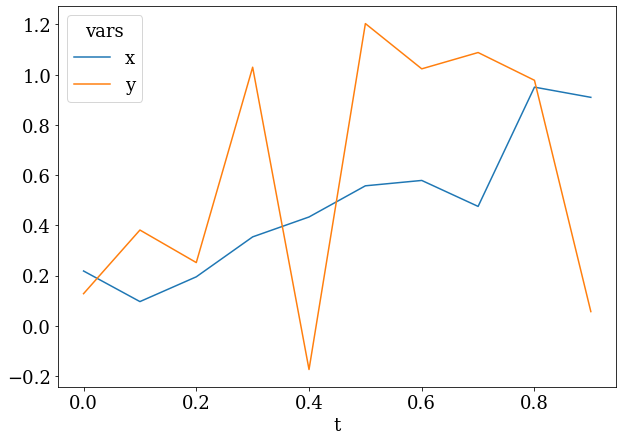

In [17]:
ax = df1.plot()
#can now use matplotlib commands on ax
ax.set_xlabel('t');

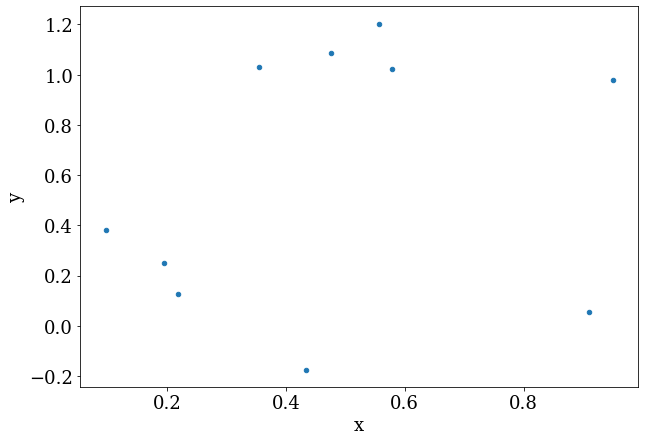

In [19]:
df1.plot('x', 'y', 'scatter')

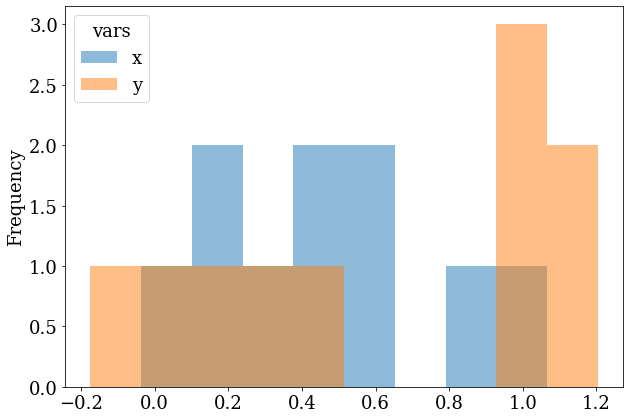

In [20]:
df1.plot(kind='hist', alpha=0.5)

### Accessing data
Get columns by slicing dataframe

NOTE: Columns are first index

In [23]:
# typically refer to columns by their actual names
# returns a pandas Series
df1['x']

t
0.0    0.218046
0.1    0.096169
0.2    0.194856
0.3    0.353908
0.4    0.433169
0.5    0.557287
0.6    0.578677
0.7    0.475248
0.8    0.950288
0.9    0.909651
Name: x, dtype: float64

In [24]:
# can also do this, but not recommended
df1.x

t
0.0    0.218046
0.1    0.096169
0.2    0.194856
0.3    0.353908
0.4    0.433169
0.5    0.557287
0.6    0.578677
0.7    0.475248
0.8    0.950288
0.9    0.909651
Name: x, dtype: float64

Get rows by slicing ```.loc``` using index, or ```.iloc``` using integer position

Note that endpoints in ```.loc``` are inclusive, unlike numpy

In [26]:
# note: endpoints are inclusive
df1.loc[0.1:0.5]

vars,x,y
t,,
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312
0.5,0.557287,1.203427


In [28]:
# iloc uses the integer positions
# not inclusive, acts like numpy
df1.iloc[1:5]

vars,x,y
t,,
0.1,0.096169,0.381162
0.2,0.194856,0.251589
0.3,0.353908,1.029643
0.4,0.433169,-0.174312


### Joining tables uses the index

In [29]:
t2 = t[::2] # takes every other value of t
z = t2**3 + np.random.normal(scale=1.0, size=t2.shape)

In [30]:
df2 = pd.DataFrame({'z': z, 'z2': z**2}, index=t2)
df2

,z,z2
0.0,0.742420,0.551188
0.2,1.636558,2.678321
0.4,-1.253546,1.571378
0.6,0.924216,0.854176
0.8,0.764846,0.584989


In [31]:
df3 = df1.join(df2)
df3

,x,y,z,z2
t,,,,
0.0,0.218046,0.127729,0.742420,0.551188
0.1,0.096169,0.381162,NaN,NaN
0.2,0.194856,0.251589,1.636558,2.678321
0.3,0.353908,1.029643,NaN,NaN
0.4,0.433169,-0.174312,-1.253546,1.571378
0.5,0.557287,1.203427,NaN,NaN
0.6,0.578677,1.023158,0.924216,0.854176
0.7,0.475248,1.088102,NaN,NaN
0.8,0.950288,0.977494,0.764846,0.584989


### Pandas handles missing data intelligently
Filling NaNs

In [35]:
df3 = df3.fillna(0)
df3

,x,y,z,z2
t,,,,
0.0,0.218046,0.127729,0.742420,0.551188
0.1,0.096169,0.381162,0.000000,0.000000
0.2,0.194856,0.251589,1.636558,2.678321
0.3,0.353908,1.029643,0.000000,0.000000
0.4,0.433169,-0.174312,-1.253546,1.571378
0.5,0.557287,1.203427,0.000000,0.000000
0.6,0.578677,1.023158,0.924216,0.854176
0.7,0.475248,1.088102,0.000000,0.000000
0.8,0.950288,0.977494,0.764846,0.584989


## Binning data and grouped operations

In [36]:
pd.cut(df3.y, 3) # want to divide y column into 3 different categories

t
0.0    (-0.176, 0.285]
0.1     (0.285, 0.744]
0.2    (-0.176, 0.285]
0.3     (0.744, 1.203]
0.4    (-0.176, 0.285]
0.5     (0.744, 1.203]
0.6     (0.744, 1.203]
0.7     (0.744, 1.203]
0.8     (0.744, 1.203]
0.9    (-0.176, 0.285]
Name: y, dtype: category
Categories (3, interval[float64]): [(-0.176, 0.285] < (0.285, 0.744] < (0.744, 1.203]]

```np.digitize``` and ```np.trunc``` (truncate floating point number) also useful for defining bins

In [37]:
# can label groups
groups = df3.groupby(pd.cut(df3.y, 3, labels=['low', 'medium', 'high']))

In [38]:
groups.mean()

,x,y,z,z2
y,,,,
low,0.438930,0.065327,0.281358,1.200222
medium,0.096169,0.381162,0.000000,0.000000
high,0.583081,1.064365,0.337812,0.287833


In [39]:
# can explicitly define bin edges
bins = [-0.75, 0, 0.75, 1.5]
pd.cut(df3.y, bins)

# if a value does not lie in any of the bins, then will put NaN in the bin entry

t
0.0     (0.0, 0.75]
0.1     (0.0, 0.75]
0.2     (0.0, 0.75]
0.3     (0.75, 1.5]
0.4    (-0.75, 0.0]
0.5     (0.75, 1.5]
0.6     (0.75, 1.5]
0.7     (0.75, 1.5]
0.8     (0.75, 1.5]
0.9     (0.0, 0.75]
Name: y, dtype: category
Categories (3, interval[float64]): [(-0.75, 0.0] < (0.0, 0.75] < (0.75, 1.5]]

In [40]:
groups = df3.groupby(pd.cut(df3.y, bins))
groups.mean()

,x,y,z,z2
y,,,,
"(-0.75, 0.0]",0.433169,-0.174312,-1.253546,1.571378
"(0.0, 0.75]",0.354680,0.204195,0.594744,0.807377
"(0.75, 1.5]",0.583081,1.064365,0.337812,0.287833


## Reading and writing data
Data     Reader     Writer
CSV      read_csv   to_csv
JSON     read_json  to_json
HTML     read_html  to_html
MS Excel read_excel to_excel
HDF5     read_hdf   to_hdf
SQL      read_sql   to_sql

etc.

In [43]:
# write dataframe to CSV file
df3.to_csv('test.csv')

# read CSV file back in
df4 = pd.read_csv('test.csv')
df4

,t,x,y,z,z2
0,0.0,0.218046,0.127729,0.742420,0.551188
1,0.1,0.096169,0.381162,0.000000,0.000000
2,0.2,0.194856,0.251589,1.636558,2.678321
3,0.3,0.353908,1.029643,0.000000,0.000000
4,0.4,0.433169,-0.174312,-1.253546,1.571378
5,0.5,0.557287,1.203427,0.000000,0.000000
6,0.6,0.578677,1.023158,0.924216,0.854176
7,0.7,0.475248,1.088102,0.000000,0.000000
8,0.8,0.950288,0.977494,0.764846,0.584989
9,0.9,0.909651,0.056299,0.000000,0.000000


### Read and write astronomical data formats via AstroPy

In [45]:
from astropy.table import Table

In [47]:
t = Table.from_pandas(df3)
t.write('test.fits')
t.write('test.tex')

In [48]:
t = Table.read('test.fits')
newdf = t.to_pandas()

## Lots more functionality
Time series (handling datas and times
 - arguments to ```read_*``` functions or try ```pd.to_datetime```
 - knows that dates occur in a certain order
 - e.g. can average over time period of one day

Applying functions to columns, rows or groups
 - ```pd.transform```, ```pd.apply```,...
 
Lots of examples on Stack Overflow, etc.
 - Prefer recent answers (a few years old likely to be out of date!)
 - Look at official documentation
   - Very good
   - Lots of tutorials

# Dask

Helpful when you have very large data sets

Essentially, gives you numpy arrays, Scikit-learn API and DataFrames that run over multiple sources of memory

In [50]:
# Arrays implement the Nimpy API
import dask.array as da
# see how it explicitly breaks into chunks
a = da.random.random(size=(10000, 10000), chunks=(1000, 1000))
x + x.T - x.mean(axis=0)

array([-0.04063767, -0.28439207, -0.08701761,  0.23108564,  0.38960763,
        0.63784398,  0.68062327,  0.47376687,  1.42384541,  1.34257222])

See slides for Pandas API and Scikit-learn API (machine-learning methods)

# Apache Spark (PySpark)
Use when (planning to scale up to) using multiple machines
- typically for dealing with very large datasets (larger than can be dealt with on a single computer)
- distributed computing on a cluster of computers
- need to setup infrastructure

# PyTables / h5py
Basically superseded by pandas and DASK

- http://pytables.github.io
- For creating, storing and analysing datasets
    - from simple, small tables to complex, huge datasets
    - standard HDF5 file format
    - incredibly fast - even faster w/ indexing
    - uses on the fly block compression
    - designed for modern systems 
        - fast multi-code CPU; large, slow memory
    - "in kernel" - data and algorithm are sent to CPU in optimal way
    - "out-of-core" - avoids loading whole dataset into memory

- Can store many things in one HDF5 file
    - E.g. multiple tables, almost like a file system
- Tree structure
- Everything in a group
- Data stored in leaves
- Arrays (e.g. n-dimensional images)

See slides for more

# Multiprocessing

Python includes modules for writing "parallel" programs:
- threaded - limited by the Global interperter lock
- multiprocessing - generally more useful

In [52]:
from multiprocessing import Pool

def f(x):
    return x*x

pool = Pool(processes=4) # start 4 worker processes

z = range(10)
print(pool.map(f, z)) # apply f to each element of z in parallel

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
